In [1]:
#importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA PREPROCESSING:

### EDA: Exploratory Data Analysis

In [2]:
#reading the csv file
df=pd.read_csv("study_hours.csv")

In [3]:
print("First five entries of the dataset:")
df.head()

First five entries of the dataset:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("Last five entries of the dataset:")
df.tail()

Last five entries of the dataset:


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


We can see there are not any null values

It shows the number of entries(rows) in the DataFrame

It lists all the columns in the DataFrame along with their data types.

It display the number of non-null values in each column, to check if there are any missing values in the dataset.

It also provides the approximate memory usage of the DataFrame.

In [5]:
print("Descriptive Statistics of every column:")
df.describe()

Descriptive Statistics of every column:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Null Value Analysis

In [6]:
print("Displaying a concise summary of the DataFrame:")
df.info()

Displaying a concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see in the above code it shows the descriptive statistice of the all numerical columns of the DataFrame.

*Count*: Number of non-null values in each numeric column.

*Mean*: Mean value (average) of each numeric column.

*Std*: Standard deviation, a measure of the dispersion or spread, of each numeric column.

*Min, Max*: Minimum and maximum value in each numeric column respectively.

*25%, 50%, 75%*: The quartile ranges.


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
count_missing_values=df.isnull().sum().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])
print("Count of missing value:",count_missing_values)

Columns with missing values:
Series([], dtype: int64)
Count of missing value: 0


Hence, there are no missing values in the dataset.

### Spliting of Data

In [8]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
#Spilliting the data into trainig and testing sets
X=df.Hours #Study hours column
y=df.Scores #Percentage scores

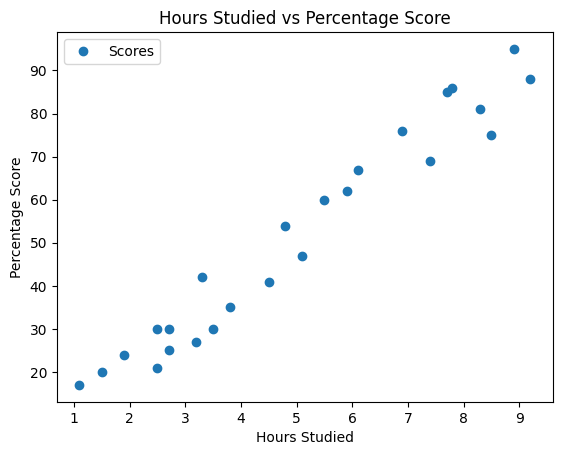

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
#Trainig of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Debugging
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)


# Reshape y_train if necessary
y_train = y_train.values.reshape(-1, 1)  # Assuming y_train is a pandas Series

# Reshape X_train if necessary
X_train = X_train.values.reshape(-1, 1)  # Assuming X_train is a pandas Series

# Reshape y_test if necessary
y_test = y_test.values.reshape(-1, 1)  # Assuming y_test is a pandas Series

# Reshape X_test if necessary
X_test = X_test.values.reshape(-1, 1)  # Assuming X_test is a pandas Series


In [12]:
#Creating our model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

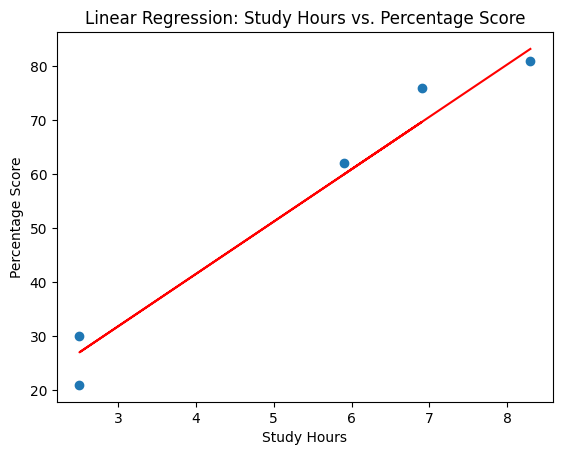

In [13]:
X_test_1d = X_test.flatten()
#Reshaping our X_test fro 2D array to 1D array

# Plotting the regression line
line = model.coef_ * X_test_1d + model.intercept_
# Reshape line to match the shape of X_test_1d
line = line.flatten()


# Plotting for the test data
plt.scatter(X_test_1d, y_test)
plt.plot(X_test_1d, line, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.title('Linear Regression: Study Hours vs. Percentage Score')
plt.show()

In [14]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 4.352380006653288


In [15]:
# Step 6: Make Predictions
# Example prediction
hours = [[9.25]]  # Input the number of study hours for prediction
predicted_percentage = model.predict(hours)
print("Predicted Percentage:", predicted_percentage[0])


Predicted Percentage: [92.38611528]
